In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error,mean_absolute_error, explained_variance_score, r2_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
# warnings.filterwarnings('ignore')

In [2]:
# Load train dataset
df_train=pd.read_excel('./Final Participant Data Folder/Final_Train.xlsx')
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
# Load test dataset
df_test=pd.read_excel('./Final Participant Data Folder/Final_Test.xlsx')
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [4]:
df_train.shape, df_test.shape

((5961, 7), (1987, 6))

### EDA

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
Qualification         1987 non-null object
Experience            1987 non-null object
Rating                897 non-null object
Place                 1981 non-null object
Profile               1987 non-null object
Miscellaneous_Info    1153 non-null object
dtypes: object(6)
memory usage: 93.2+ KB


In [7]:
# Identify the duplicate records
df_train.duplicated().sum()

40

In [8]:
# Identify the duplicate records
df_test.duplicated().sum()

11

In [9]:
# Reomove duplicates
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

In [10]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [11]:
df_train.shape, df_test.shape

((5921, 7), (1976, 6))

In [12]:
df_train.isna().sum(), df_test.isna().sum()

(Qualification            0
 Experience               0
 Rating                3262
 Place                    2
 Profile                  0
 Miscellaneous_Info    2581
 Fees                     0
 dtype: int64, Qualification            0
 Experience               0
 Rating                1079
 Place                    1
 Profile                  0
 Miscellaneous_Info     823
 dtype: int64)

In [13]:
df_train.Miscellaneous_Info.unique()    

array(['100% 16 Feedback Kakkanad, Ernakulam',
       '98% 76 Feedback Whitefield, Bangalore', nan, ...,
       '98% 45 Feedback Basavanagudi, Bangalore',
       '97% 11 Feedback Greater Kailash Part 2, Delhi',
       'General Medical Consultation Viral Fever Treatment Infectious Disease Treatment'],
      dtype=object)

In [14]:
# We can drop Miscellaneous_Info since it is not uniform and has many null data 
df_train.drop(['Miscellaneous_Info'],inplace=True, axis=1)
df_test.drop(['Miscellaneous_Info'],inplace=True, axis=1)

In [15]:
df_train.Rating.unique() 

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%'], dtype=object)

In [16]:
# Strip % and convert Rating to float for train dataset
df_train['Rating']=df_train['Rating'].str.replace("%","")
df_train['Rating']=df_train['Rating'].astype(float)

In [17]:
df_train['Rating']=df_train['Rating'].fillna(df_train['Rating'].mean())
df_train.Rating.unique()

array([100.        ,  98.        ,  94.64347499,  99.        ,
        79.        ,  95.        ,  97.        ,  94.        ,
        88.        ,  90.        ,  80.        ,  93.        ,
        36.        ,  78.        ,  87.        ,  96.        ,
        82.        ,  89.        ,  74.        ,  86.        ,
        92.        ,  83.        ,  76.        ,  85.        ,
        56.        ,  91.        ,  68.        ,  60.        ,
        75.        ,  69.        ,  73.        ,  67.        ,
        77.        ,  33.        ,  55.        ,  71.        ,
        84.        ,  45.        ,  63.        ,  72.        ,
        81.        ,  62.        ,  57.        ,   7.        ,
        48.        ,  40.        ,  70.        ,  64.        ,
        65.        ,  47.        ,  58.        ,  53.        ])

In [18]:
# Strip % and convert Rating to float for test dataset
df_test['Rating']=df_test['Rating'].str.replace("%","")
df_test['Rating']=df_test['Rating'].astype(float)
df_test['Rating']=df_test['Rating'].fillna(df_test['Rating'].mean())

In [19]:
df_train.isna().sum(), df_test.isna().sum()

(Qualification    0
 Experience       0
 Rating           0
 Place            2
 Profile          0
 Fees             0
 dtype: int64, Qualification    0
 Experience       0
 Rating           0
 Place            1
 Profile          0
 dtype: int64)

In [20]:
# Place has small number of record as null and so we can drop these null records
df_train = df_train.dropna(axis = 0)
df_test = df_test.dropna(axis = 0)
df_train.isna().sum(), df_test.isna().sum()

(Qualification    0
 Experience       0
 Rating           0
 Place            0
 Profile          0
 Fees             0
 dtype: int64, Qualification    0
 Experience       0
 Rating           0
 Place            0
 Profile          0
 dtype: int64)

In [21]:
df_train.Experience.unique() 

array(['24 years experience', '12 years experience', '9 years experience',
       '20 years experience', '8 years experience', '42 years experience',
       '10 years experience', '14 years experience',
       '23 years experience', '5 years experience', '7 years experience',
       '21 years experience', '19 years experience',
       '41 years experience', '31 years experience',
       '25 years experience', '16 years experience',
       '15 years experience', '11 years experience',
       '22 years experience', '38 years experience', '6 years experience',
       '36 years experience', '13 years experience',
       '18 years experience', '46 years experience',
       '40 years experience', '49 years experience',
       '33 years experience', '27 years experience',
       '30 years experience', '52 years experience',
       '60 years experience', '26 years experience',
       '35 years experience', '34 years experience',
       '39 years experience', '32 years experience',
       '17 y

In [22]:
# Convert years of experience to int for train dataset
exp = df_train["Experience"].str.split(" ")
df_train["Experience"] = exp.str[0].astype("int")

In [23]:
# Convert years of experience to int for train dataset
exp = df_test["Experience"].str.split(" ")
df_test["Experience"] = exp.str[0].astype("int")

In [24]:
df_train.Qualification.unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [25]:
# We can see lot of qualifications, we can splt these qualifications for train
qlfn = df_train["Qualification"].str.split(",", n = 8, expand = True)
qlfn = qlfn.fillna('NA')
df_train = pd.concat([qlfn, df_train], axis=1)
df_train = df_train.drop(['Qualification'], axis=1)
df_train.rename(columns={0: 'Q1', 1: 'Q2', 2:'Q3', 3:'Q4', 4:'Q5', 5:'Q6', 6:'Q7', 7:'Q8', 8:'Q9'}, inplace=True)
df_train.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Experience,Rating,Place,Profile,Fees
0,BHMS,MD - Homeopathy,NA,NA,NA,NA,NA,NA,NA,24,100.000000,"Kakkanad, Ernakulam",Homeopath,100
1,BAMS,MD - Ayurveda Medicine,NA,NA,NA,NA,NA,NA,NA,12,98.000000,"Whitefield, Bangalore",Ayurveda,350
2,MBBS,MS - Otorhinolaryngology,NA,NA,NA,NA,NA,NA,NA,9,94.643475,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,BSc - Zoology,BAMS,NA,NA,NA,NA,NA,NA,NA,12,94.643475,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,NA,NA,NA,NA,NA,NA,NA,NA,20,100.000000,"Keelkattalai, Chennai",Ayurveda,250


In [26]:
# We can see lot of qualifications, we can splt these qualifications for test dataset
qlfn = df_test["Qualification"].str.split(",", n = 8, expand = True)
qlfn = qlfn.fillna('NA')
df_test = pd.concat([qlfn, df_test], axis=1)
df_test = df_test.drop(['Qualification'], axis=1)
df_test.rename(columns={0: 'Q1', 1: 'Q2', 2:'Q3', 3:'Q4', 4:'Q5', 5:'Q6', 6:'Q7', 7:'Q8', 8:'Q9'}, inplace=True)
df_test.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Experience,Rating,Place,Profile
0,MBBS,NA,NA,NA,NA,NA,NA,NA,NA,35,94.441472,"Ghatkopar East, Mumbai",General Medicine
1,MBBS,Diploma in Otorhinolaryngology (DLO),NA,NA,NA,NA,NA,NA,NA,31,94.441472,"West Marredpally, Hyderabad",ENT Specialist
2,MBBS,DDVL,NA,NA,NA,NA,NA,NA,NA,40,70.000000,"KK Nagar, Chennai",Dermatologists
3,BAMS,NA,NA,NA,NA,NA,NA,NA,NA,0,94.441472,"New Ashok Nagar, Delhi",Ayurveda
4,BDS,MDS - Conservative Dentistry & Endodontics,NA,NA,NA,NA,NA,NA,NA,16,100.000000,"Kanakpura Road, Bangalore",Dentist


In [27]:
df_train.dtypes, df_test.dtypes


(Q1             object
 Q2             object
 Q3             object
 Q4             object
 Q5             object
 Q6             object
 Q7             object
 Q8             object
 Q9             object
 Experience      int32
 Rating        float64
 Place          object
 Profile        object
 Fees            int64
 dtype: object, Q1             object
 Q2             object
 Q3             object
 Q4             object
 Q5             object
 Q6             object
 Q7             object
 Q8             object
 Q9             object
 Experience      int32
 Rating        float64
 Place          object
 Profile        object
 dtype: object)

In [28]:
# We can split Place into Locality and City
place = df_train["Place"].str.split(",")
df_train["Locality"] = place.str[0]
df_train["City"] = place.str[1]

In [29]:
# We can split Place into Locality and City
place = df_test["Place"].str.split(",")
df_test["Locality"] = place.str[0]
df_test["City"] = place.str[1]

In [30]:
# We can drop Place from both datasets
df_train = df_train.drop(['Place'], axis=1)
df_test = df_test.drop(['Place'], axis=1)

In [31]:
df_train.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Experience,Rating,Profile,Fees,Locality,City
0,BHMS,MD - Homeopathy,NA,NA,NA,NA,NA,NA,NA,24,100.000000,Homeopath,100,Kakkanad,Ernakulam
1,BAMS,MD - Ayurveda Medicine,NA,NA,NA,NA,NA,NA,NA,12,98.000000,Ayurveda,350,Whitefield,Bangalore
2,MBBS,MS - Otorhinolaryngology,NA,NA,NA,NA,NA,NA,NA,9,94.643475,ENT Specialist,300,Mathikere - BEL,Bangalore
3,BSc - Zoology,BAMS,NA,NA,NA,NA,NA,NA,NA,12,94.643475,Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,NA,NA,NA,NA,NA,NA,NA,NA,20,100.000000,Ayurveda,250,Keelkattalai,Chennai


In [32]:
df_test.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Experience,Rating,Profile,Locality,City
0,MBBS,NA,NA,NA,NA,NA,NA,NA,NA,35,94.441472,General Medicine,Ghatkopar East,Mumbai
1,MBBS,Diploma in Otorhinolaryngology (DLO),NA,NA,NA,NA,NA,NA,NA,31,94.441472,ENT Specialist,West Marredpally,Hyderabad
2,MBBS,DDVL,NA,NA,NA,NA,NA,NA,NA,40,70.000000,Dermatologists,KK Nagar,Chennai
3,BAMS,NA,NA,NA,NA,NA,NA,NA,NA,0,94.441472,Ayurveda,New Ashok Nagar,Delhi
4,BDS,MDS - Conservative Dentistry & Endodontics,NA,NA,NA,NA,NA,NA,NA,16,100.000000,Dentist,Kanakpura Road,Bangalore


In [33]:
df_train.isna().sum(), df_test.isna().sum()

(Q1            0
 Q2            0
 Q3            0
 Q4            0
 Q5            0
 Q6            0
 Q7            0
 Q8            0
 Q9            0
 Experience    0
 Rating        0
 Profile       0
 Fees          0
 Locality      0
 City          1
 dtype: int64, Q1            0
 Q2            0
 Q3            0
 Q4            0
 Q5            0
 Q6            0
 Q7            0
 Q8            0
 Q9            0
 Experience    0
 Rating        0
 Profile       0
 Locality      0
 City          0
 dtype: int64)

In [34]:
# One City is missing, since this is only one record we can drop it
df_train = df_train.dropna(axis = 0)

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5918 entries, 0 to 5960
Data columns (total 15 columns):
Q1            5918 non-null object
Q2            5918 non-null object
Q3            5918 non-null object
Q4            5918 non-null object
Q5            5918 non-null object
Q6            5918 non-null object
Q7            5918 non-null object
Q8            5918 non-null object
Q9            5918 non-null object
Experience    5918 non-null int32
Rating        5918 non-null float64
Profile       5918 non-null object
Fees          5918 non-null int64
Locality      5918 non-null object
City          5918 non-null object
dtypes: float64(1), int32(1), int64(1), object(12)
memory usage: 716.6+ KB


In [36]:
df_train.shape, df_test.shape

((5918, 15), (1975, 14))

In [37]:
from sklearn.preprocessing import LabelEncoder
df_testing = df_train.copy()
le_Q1   = LabelEncoder()
le_Q1.fit(df_train['Q1'].unique())
df_train['Q1'] = le_Q1.transform(df_train['Q1'])

In [38]:
# Encoding Categorical Variables for train data
from sklearn.preprocessing import LabelEncoder
le_Q1        = LabelEncoder()
le_Q2        = LabelEncoder()
le_Q3        = LabelEncoder()
le_Q4        = LabelEncoder()
le_Q5        = LabelEncoder()
le_Q6        = LabelEncoder()
le_Q7        = LabelEncoder()
le_Q8        = LabelEncoder()
le_Q9        = LabelEncoder()

le_Profile   = LabelEncoder()
le_Locality  = LabelEncoder() 
le_City      = LabelEncoder()

le_Q1.fit(df_train['Q1'].unique())
le_Q2.fit(df_train['Q2'].unique())
le_Q3.fit(df_train['Q3'].unique())
le_Q4.fit(df_train['Q4'].unique())
le_Q5.fit(df_train['Q5'].unique())
le_Q6.fit(df_train['Q6'].unique())
le_Q7.fit(df_train['Q7'].unique())
le_Q8.fit(df_train['Q8'].unique())
le_Q9.fit(df_train['Q9'].unique())


le_Profile.fit(df_train['Profile'].unique())
le_City.fit(df_train['City'].unique())
le_Locality.fit(df_train['Locality'].unique())

df_train['Q1']       = le_Q1.transform(df_train['Q1'])
df_train['Q2']       = le_Q2.transform(df_train['Q2'])
df_train['Q3']       = le_Q3.transform(df_train['Q3'])
df_train['Q4']       = le_Q4.transform(df_train['Q4'])
df_train['Q5']       = le_Q5.transform(df_train['Q5'])
df_train['Q6']       = le_Q6.transform(df_train['Q6'])
df_train['Q7']       = le_Q7.transform(df_train['Q7'])
df_train['Q8']       = le_Q8.transform(df_train['Q8'])
df_train['Q9']       = le_Q9.transform(df_train['Q9'])

df_train['Profile']  = le_Profile.transform(df_train['Profile'])
df_train['City']     = le_City.transform(df_train['City'])
df_train['Locality'] = le_Locality.transform(df_train['Locality'])

In [39]:
le_Q1        = LabelEncoder()
le_Q2        = LabelEncoder()
le_Q3        = LabelEncoder()
le_Q4        = LabelEncoder()
le_Q5        = LabelEncoder()
le_Q6        = LabelEncoder()
le_Q7        = LabelEncoder()
le_Q8        = LabelEncoder()
le_Q9        = LabelEncoder()

le_Profile   = LabelEncoder()
le_Locality  = LabelEncoder() 
le_City      = LabelEncoder()

le_Q1.fit(df_test['Q1'].unique())
le_Q2.fit(df_test['Q2'].unique())
le_Q3.fit(df_test['Q3'].unique())
le_Q4.fit(df_test['Q4'].unique())
le_Q5.fit(df_test['Q5'].unique())
le_Q6.fit(df_test['Q6'].unique())
le_Q7.fit(df_test['Q7'].unique())
le_Q8.fit(df_test['Q8'].unique())
le_Q9.fit(df_test['Q9'].unique())


le_Profile.fit(df_test['Profile'].unique())
le_City.fit(df_test['City'].unique())
le_Locality.fit(df_test['Locality'].unique())

df_test['Q1']       = le_Q1.transform(df_test['Q1'])
df_test['Q2']       = le_Q2.transform(df_test['Q2'])
df_test['Q3']       = le_Q3.transform(df_test['Q3'])
df_test['Q4']       = le_Q4.transform(df_test['Q4'])
df_test['Q5']       = le_Q5.transform(df_test['Q5'])
df_test['Q6']       = le_Q6.transform(df_test['Q6'])
df_test['Q7']       = le_Q7.transform(df_test['Q7'])
df_test['Q8']       = le_Q8.transform(df_test['Q8'])
df_test['Q9']       = le_Q9.transform(df_test['Q9'])

df_test['Profile']  = le_Profile.transform(df_test['Profile'])
df_test['City']     = le_City.transform(df_test['City'])
df_test['Locality'] = le_Locality.transform(df_test['Locality'])

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5918 entries, 0 to 5960
Data columns (total 15 columns):
Q1            5918 non-null int64
Q2            5918 non-null int32
Q3            5918 non-null int32
Q4            5918 non-null int32
Q5            5918 non-null int32
Q6            5918 non-null int32
Q7            5918 non-null int32
Q8            5918 non-null int32
Q9            5918 non-null int32
Experience    5918 non-null int32
Rating        5918 non-null float64
Profile       5918 non-null int32
Fees          5918 non-null int64
Locality      5918 non-null int32
City          5918 non-null int32
dtypes: float64(1), int32(12), int64(2)
memory usage: 462.3 KB


In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 1986
Data columns (total 14 columns):
Q1            1975 non-null int32
Q2            1975 non-null int32
Q3            1975 non-null int32
Q4            1975 non-null int32
Q5            1975 non-null int32
Q6            1975 non-null int32
Q7            1975 non-null int32
Q8            1975 non-null int32
Q9            1975 non-null int32
Experience    1975 non-null int32
Rating        1975 non-null float64
Profile       1975 non-null int32
Locality      1975 non-null int32
City          1975 non-null int32
dtypes: float64(1), int32(13)
memory usage: 131.2 KB


In [42]:
df_train.columns.values

array(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Experience',
       'Rating', 'Profile', 'Fees', 'Locality', 'City'], dtype=object)

In [44]:
# Lets rearrange the columns
df_train = df_train[['Q1', 'Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Experience', 'Rating', 'Profile',
       'Locality', 'City', 'Fees']]
df_train.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Experience,Rating,Profile,Locality,City,Fees
0,8,252,405,209,95,31,12,6,4,24,100.000000,5,296,4,100
1,5,241,405,209,95,31,12,6,4,12,98.000000,0,855,0,350
2,78,334,405,209,95,31,12,6,4,9,94.643475,3,452,0,300
3,12,7,405,209,95,31,12,6,4,12,94.643475,0,68,0,250
4,5,425,405,209,95,31,12,6,4,20,100.000000,0,335,1,250


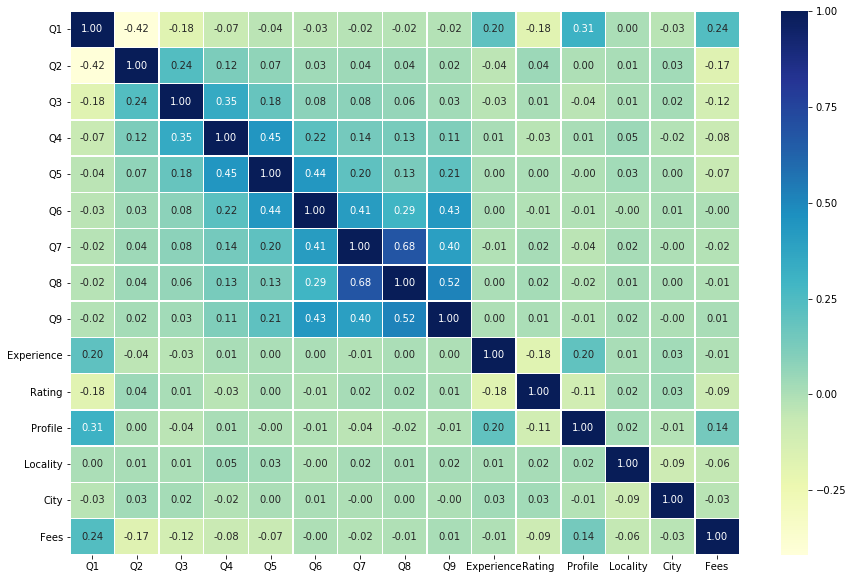

In [45]:
# Let's plot the train set correlation matrix
corr_matrix = df_train.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

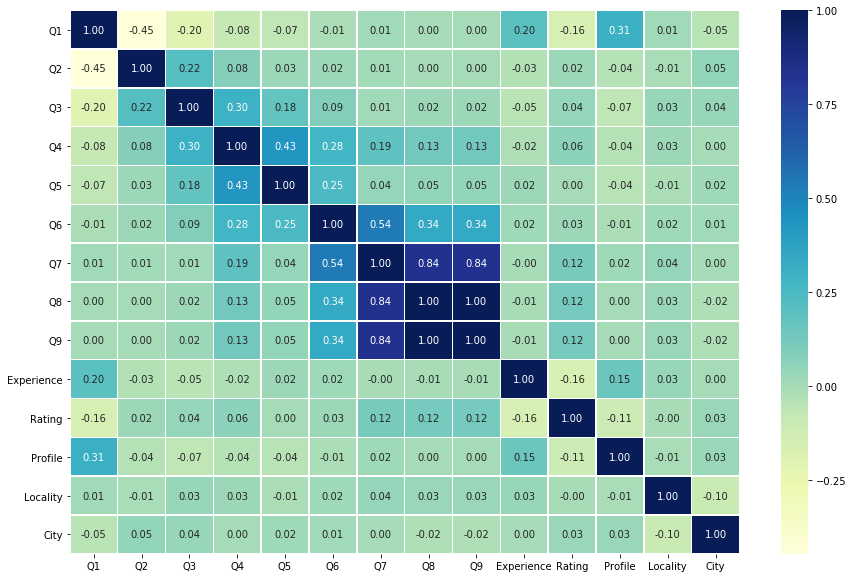

In [46]:
# Let's plot the test set correlation matrix
corr_matrix = df_test.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [47]:
# Check and remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df_train))
print("The datashape before removing outliers: ", df_train.shape)
df_final = df_train[(z<3).all(axis=1)]
print("The datashape after removing outliers: ", df_final.shape)

The datashape before removing outliers:  (5918, 15)
The datashape after removing outliers:  (5414, 15)


In [48]:
# Lets start modelling
# Split data into X and y
X = df_final.drop("Fees", axis=1)
y = df_final["Fees"]

In [49]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [50]:
features = df_test.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(df_test)
df_test = pd.DataFrame(scaler.transform(df_test))
df_test.columns = features


In [51]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4331, 14), (1083, 14), (4331,), (1083,))

In [53]:
# Put models in a dictionary
models = {"Linear Regression": LinearRegression(),
          "KNN": KNeighborsRegressor(),
          "Decision Tree": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor(),
          "Lasso":Lasso(),
          "Support Vector Regression": SVR()
          }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [54]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Linear Regression': 0.11230917209601632,
 'KNN': 0.05446927929173684,
 'Decision Tree': -0.6327177757005473,
 'Random Forest': 0.1951939493566378,
 'Lasso': 0.10194396653487992,
 'Support Vector Regression': 0.056581897932192815}

In [55]:
def max_acc_score(reg, x, y):
    max_r2_score=0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = r_state, test_size=0.20)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        r2_score1=r2_score(y_test, pred)
        if r2_score1 > max_r2_score:
            max_r2_score = r2_score1
            final_r_state = r_state
    print("The max accuracy score for", reg, "is: ", max_r2_score, " achieved at", final_r_state)

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
max_acc_score(gbr, X, y)

The max accuracy score for GradientBoostingRegressor() is:  0.2609145706985585  achieved at 43


In [57]:
rf =RandomForestRegressor()
max_acc_score(rf, X, y)

The max accuracy score for RandomForestRegressor() is:  0.23264180382192556  achieved at 43


#### Here GradientBoost and Random forest is showing better accuracy, we can proceed further tune these two.

In [58]:
rf = RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf = GridSearchCV(rf,parameters)
gdrf.fit(X_train, y_train)
gdrf.best_params_

{'n_estimators': 100}

In [59]:
gbr = GradientBoostingRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf = GridSearchCV(gbr, parameters)
gdrf.fit(X_train, y_train)
gdrf.best_params_

{'n_estimators': 200}

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=43)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
r2score = r2_score(y_test, pred)
cv = cross_val_score(rf, X, y, cv=5, scoring='r2').mean()
print("The accuracy score is", r2score)
print("The cross val score is", cv)

The accuracy score is 0.229723636573119
The cross val score is 0.15622343019332074


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=43)
gbr = GradientBoostingRegressor(n_estimators=200)
gbr.fit(X_train, y_train)
pred = gbr.predict(X_test)
r2score = r2_score(y_test, pred)
cv = cross_val_score(gbr, X, y, cv=5, scoring='r2').mean()
print("The accuracy score is", r2score)
print("The cross val score is", cv)

The accuracy score is 0.27396852870902166
The cross val score is 0.20568894477905939


In [63]:
def analyse_model(model):    
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("R2 model score: %.2f " % model.score(X_test,y_test))
    print("Mean squared error: %.2f " % mean_squared_error(y_test,pred))
    print("mean_absolute_error: %.2f " % mean_absolute_error(y_test,pred))
    print("explained_variance_score: %.2f " % explained_variance_score(y_test,pred)) 
  #  print("cross_val_score: %.2f " % cross_val_score(model, X_train, y_train,cv=5).mean())
    print("R2_Score: %.2f " % r2_score(y_test,pred))
    print(pd.DataFrame({'Fees':y_test,'Fees Predicted':pred}).head(10))

In [64]:
# Further tune with AdaBoostRegressor
ada_rfregressor=AdaBoostRegressor()
ada_rfregressor=AdaBoostRegressor(base_estimator=rf, learning_rate=0.1)
ada_rfregressor.fit(X_train, y_train)
ada_pred = ada_rfregressor.predict(X_test)
analyse_model(ada_rfregressor)

R2 model score: 0.25 
Mean squared error: 26897.89 
mean_absolute_error: 129.91 
explained_variance_score: 0.25 
R2_Score: 0.25 
      Fees  Fees Predicted
158    300      202.000000
5903   500      312.000000
2208   100      423.900000
4937   200      213.500000
5552   350      347.000000
3895   800      439.500000
1048   400      288.100000
5323   100      266.411111
1249   500      364.300000
4172   600      500.500000


In [65]:
# Further tune with AdaBoostRegressor
ada_rfregressor=AdaBoostRegressor()
ada_rfregressor=AdaBoostRegressor(base_estimator=gbr, learning_rate=0.1)
ada_rfregressor.fit(X_train, y_train)
ada_pred = ada_rfregressor.predict(X_test)
analyse_model(ada_rfregressor)

R2 model score: 0.26 
Mean squared error: 26391.39 
mean_absolute_error: 130.34 
explained_variance_score: 0.27 
R2_Score: 0.26 
      Fees  Fees Predicted
158    300      216.060533
5903   500      285.574830
2208   100      415.375731
4937   200      240.692293
5552   350      375.377236
3895   800      409.096602
1048   400      294.417724
5323   100      284.473820
1249   500      373.005955
4172   600      433.762143


### We can finalise gbr as our final model

In [66]:
# Predicting the test data
predtest = gbr.predict(df_test)
pd.DataFrame(predtest).to_csv("doctor_fees_prediction.csv")

In [67]:
# Lets Save the model as pickle in a file
import pickle
filename = 'doctor_fees_prediction.pkl'
pickle.dump(gbr, open(filename, 'wb'))